In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import reverse_geocoder as rg
import pprint 
from pygeocoder import Geocoder

In [172]:
#https://www.kaggle.com/aakashnain/eda-nytaxi
train=pd.read_csv('train/train.csv')
test=pd.read_csv('test/test.csv')

In [173]:
train.info()        # No Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [174]:
print('Total number of training samples are : ', train.shape[0])
print('Total number of testing samples are : ', test.shape[0])

Total number of training samples are :  1458644
Total number of testing samples are :  625134


In [175]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [176]:
nameofdays={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [177]:
'''Perform Feature Engineering'''
#train['pickup_datetime']=train['pickup_datetime'].apply(lambda x:pd.to_datetime(x))

train['pickup_datetime']=pd.to_datetime(train['pickup_datetime'])     #This approach is very fast as compared to the above one
train['dropoff_datetime']=pd.to_datetime(train['dropoff_datetime'])     

train['Hour']=train.pickup_datetime.dt.hour
train['Month']=train.pickup_datetime.dt.month
train['Day']=train.pickup_datetime.dt.dayofweek
train['DayName']=train.Day.map(nameofdays)

  # Lets Start with EDA

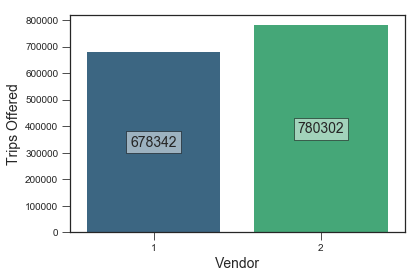

In [178]:
ax=plt.figure()
ax=sns.countplot(x='vendor_id',data=train,palette='viridis')
plt.ylabel('Trips Offered',fontsize=14)
plt.xlabel('Vendor',fontsize=14)
for i in ax.patches:
    x,y=i.xy
    w=i.get_width()
    h=i.get_height()
    plt.text(x=x+w/2,y=h.max()*1/2,s=h,fontsize=14,horizontalalignment='center',verticalalignment='center',bbox=dict(facecolor='w', alpha=0.5))
    


In [179]:
print('Total Percentage of Vendor=1 is {:0f}%'.format((train[train['vendor_id']==1].vendor_id.count()/train.vendor_id.count())*100))
print('Total Percentage of Vendor=2 is {:0f}%'.format((train[train['vendor_id']==2].vendor_id.count()/train.vendor_id.count())*100))
'''Now will check how to have a percentage graph instead of a countplot?????'''


Total Percentage of Vendor=1 is 46.504973%
Total Percentage of Vendor=2 is 53.495027%


'Now will check how to have a percentage graph instead of a countplot?????'

In [180]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Hour,Month,Day,DayName
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,3,0,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,6,6,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,1,1,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,4,2,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,3,5,Saturday


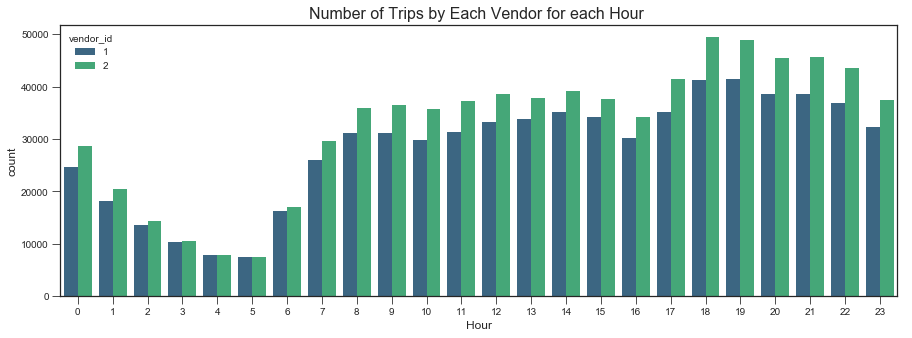

In [181]:
plt.figure(figsize=(15,5))
plt.ylabel('Number of Trips',fontsize=12)
plt.xlabel('Hours',fontsize=12)
plt.title('Number of Trips by Each Vendor for each Hour ',fontsize=16)
sns.countplot(x='Hour',data=train,palette='viridis',hue='vendor_id')


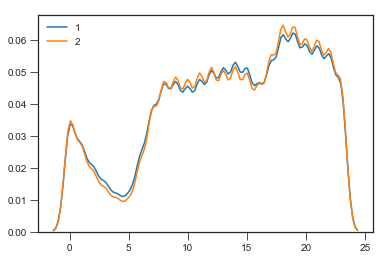

In [182]:
ax=sns.kdeplot(train[train['vendor_id']==1]['Hour'],label='1')
ax=sns.kdeplot(train[train['vendor_id']==2]['Hour'],label='2')


'How to cange the order without changing the values'

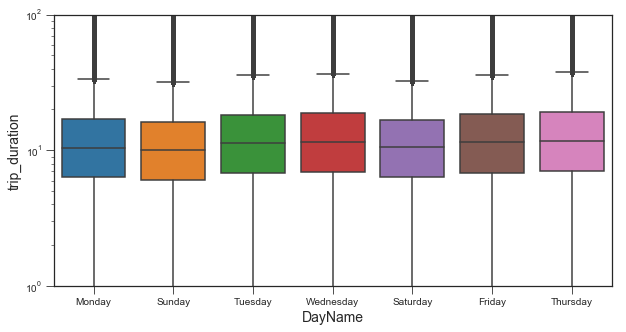

In [183]:
ax=plt.figure(figsize=(10,5))
bo=train.trip_duration/60

plt.yscale('log')
plt.ylim([1,100])

plt.ylabel('Trip Duration in Mins(Logarithmic)',fontsize=14)
plt.xlabel('Day',fontsize=14)

ax=sns.boxplot(x='DayName',y=bo,data=train) 
'''How to cange the order without changing the values'''

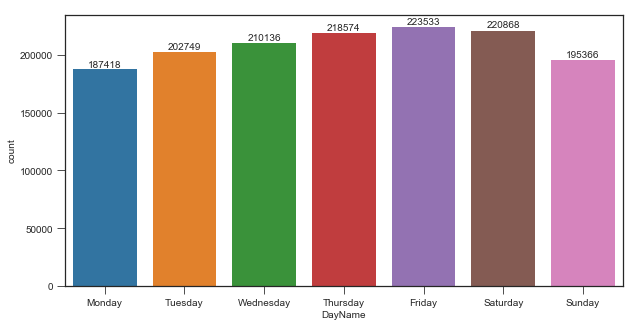

In [184]:
ax=plt.figure(figsize=(10,5))
plt.tight_layout()
ax=sns.countplot(x='DayName',data=train,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
for i in ax.patches:
    x,y=i.xy
    w=i.get_width()
    h=i.get_height()
    plt.text(x=x+w/2,y=h*1.022,s=h,horizontalalignment='center',verticalalignment='center')

"\nHere we do observe outliers but still there might be many outliers which can't be seen since the range is big.\nSo next we will use log \n"

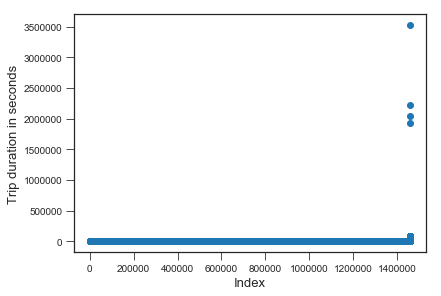

In [185]:
'''Lets check for any outlier with trip duration '''
plt.figure(figsize=(6,4))
plt.scatter(x=train.trip_duration.index,y=train.trip_duration.sort_values(),data=train)
#plt.scatter(x=range(len(train.trip_duration)),y=train.trip_duration.sort_values())      OTHER WAY OF SOLVING
plt.tight_layout()
plt.xlabel('Index',fontsize=13)
plt.ylabel('Trip duration in seconds',fontsize=13)
#plt.ylim([0,50000])
ax=sns.set_style("ticks",{"xtick.major.size": 8, "ytick.major.size": 8})

'''
Here we do observe outliers but still there might be many outliers which can't be seen since the range is big.
So next we will use log 
'''


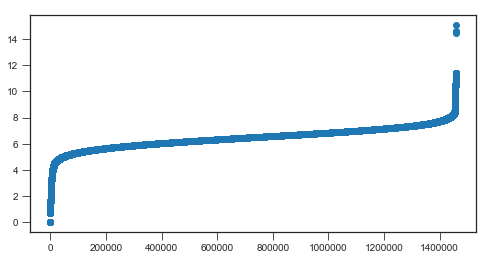

In [186]:
'''Log Plot to see if there are any further outliers since the range/variance was a lot'''
plt.figure(figsize=(8,4))
plt.tight_layout()
plt.scatter(x=train.trip_duration.index,y=np.log(train.trip_duration.sort_values()))

Text(0.5,1,'Dropoff Longitude')

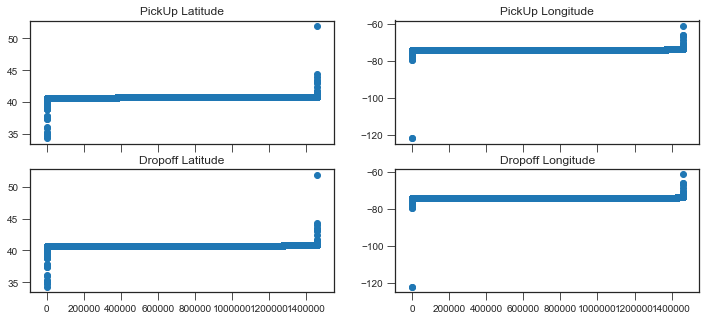

In [187]:
fig,ax=plt.subplots(2,2,sharex=True,figsize=(12,5))


ax[0,0].scatter(x=range(len(train.pickup_latitude)),y=train.pickup_latitude.sort_values(),data=train)
ax[0,1].scatter(x=range(len(train.pickup_longitude)),y=train.pickup_longitude.sort_values(),data=train)
ax[1,0].scatter(x=range(len(train.dropoff_latitude)),y=train.pickup_latitude.sort_values(),data=train)
ax[1,1].scatter(x=range(len(train.dropoff_longitude)),y=train.pickup_longitude.sort_values(),data=train)
ax[0,0].set_title('PickUp Latitude')
ax[0,1].set_title('PickUp Longitude')
ax[1,0].set_title('Dropoff Latitude')
ax[1,1].set_title('Dropoff Longitude')              #Change the position of the title if possible?????

There are few outliers as we see in the above plot.we will only be considering New York. So we will drop others. 
Also find if there is a better way to have a subplot?????

In [188]:
train.sort_values('trip_duration',ascending=False).head(100)
'''
We observe there are few records where trip duration is huge so let's 
check the disance of that trip and then decide to keep or ignore it 
'''

"\nWe observe there are few records where trip duration is huge so let's \ncheck the disance of that trip and then decide to keep or ignore it \n"


# Next we calculate the distance based on Latitude and Longitude

In [189]:
from math import sin, cos, sqrt, atan2, radians

In [190]:
def dist(x):
    R = 6373.0
    
    lat1 = radians(x[0])
    lon1 = radians(x[1])
    lat2 = radians(x[2])
    lon2 = radians(x[3])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    distance_mile=distance/1.60934
    return distance_mile


In [191]:
df=train[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']]
train['Distance']=df.apply(dist,axis=1)

In [192]:
train.sort_values('Distance')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Hour,Month,Day,DayName,Distance
466799,id2551005,2,2016-05-14 22:13:52,2016-05-14 22:17:31,1,-73.982330,40.742901,-73.982330,40.742901,N,219,22,5,5,Saturday,0.000000
212128,id1600053,2,2016-02-23 05:28:43,2016-02-23 05:31:44,4,-73.978851,40.728119,-73.978851,40.728119,N,181,5,2,1,Tuesday,0.000000
821598,id0401568,2,2016-01-19 13:03:27,2016-01-19 13:13:19,1,-73.951279,40.770721,-73.951279,40.770721,N,592,13,1,1,Tuesday,0.000000
271721,id0953607,2,2016-04-30 20:58:22,2016-04-30 21:03:09,1,-73.998550,40.757561,-73.998550,40.757561,N,287,20,4,5,Saturday,0.000000
1411622,id0487060,1,2016-02-25 19:36:53,2016-02-25 19:37:36,1,-74.040390,40.736027,-74.040390,40.736027,N,43,19,2,3,Thursday,0.000000
750030,id3949127,1,2016-05-25 14:16:52,2016-05-25 14:32:24,1,-73.985336,40.755459,-73.985336,40.755459,N,932,14,5,2,Wednesday,0.000000
325094,id1278049,1,2016-01-09 23:40:16,2016-01-09 23:52:01,1,-73.964264,40.797325,-73.964264,40.797325,N,705,23,1,5,Saturday,0.000000
389655,id1086071,1,2016-02-10 09:05:55,2016-02-10 09:06:22,1,-73.935890,40.740372,-73.935890,40.740372,N,27,9,2,2,Wednesday,0.000000
1013690,id3515368,1,2016-06-14 07:58:28,2016-06-14 07:58:30,1,-73.958374,40.598701,-73.958374,40.598701,N,2,7,6,1,Tuesday,0.000000
361531,id3108338,2,2016-02-27 15:13:10,2016-02-27 15:15:57,1,-73.984764,40.739296,-73.984764,40.739296,N,167,15,2,5,Saturday,0.000000


The Distance is 0 in some cases.It can be the ride is from A to B and again come back to A making the distance to be 0.
But we will eliminate such records where distance=0 just to make sure our model is trained better.
(Will check how many such records are if there are many then will have to find an alternate way to solve this problem)

In [193]:
'''           The Other way of calculating the Distance using the Python Library'''
from geopy.distance import geodesic
A=(40.758633,-73.972366)
B=(43.674000,-79.553535)
print(round(geodesic(A,B).miles))
print(round(dist([40.758633,-73.972366,43.674000,-79.553535])))
'''The values are a bit different so rounded them '''

350
349


'The values are a bit different so rounded them '

In [194]:
'''Lets see if the distance is also a lot for large trip duration'''
train.sort_values(by='trip_duration',ascending=False)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Hour,Month,Day,DayName,Distance
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282,22,2,5,Saturday,12.369610
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612,6,1,1,Tuesday,1.016343
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578,22,2,5,Saturday,3.718521
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736,0,1,1,Tuesday,12.523761
1234291,id1942836,2,2016-02-15 23:18:06,2016-02-16 23:17:58,2,-73.794525,40.644825,-73.991051,40.755573,N,86392,23,2,0,Monday,12.830852
295382,id0593332,2,2016-05-31 13:00:39,2016-06-01 13:00:30,1,-73.781952,40.644688,-73.993874,40.745926,N,86391,13,5,1,Tuesday,13.125712
73816,id0953667,2,2016-05-06 00:00:10,2016-05-07 00:00:00,1,-73.996010,40.753220,-73.979027,40.740601,N,86390,0,5,4,Friday,1.245575
59891,id2837671,2,2016-06-30 16:37:52,2016-07-01 16:37:39,1,-73.992279,40.749729,-73.962524,40.800770,N,86387,16,6,3,Thursday,3.856145
1360439,id1358458,2,2016-06-23 16:01:45,2016-06-24 16:01:30,1,-73.782089,40.644806,-73.985016,40.666828,N,86385,16,6,3,Thursday,10.748433
753765,id2589925,2,2016-05-17 22:22:56,2016-05-18 22:22:35,4,-74.006111,40.734680,-73.958809,40.815449,N,86379,22,5,1,Tuesday,6.106712


So just for 12 miles of distance the trip is taking approximately 98 Hours (1st Row).So this is definitely an outlier/noise.Similarly we can observe many such records.So we will drop such records when training our model.

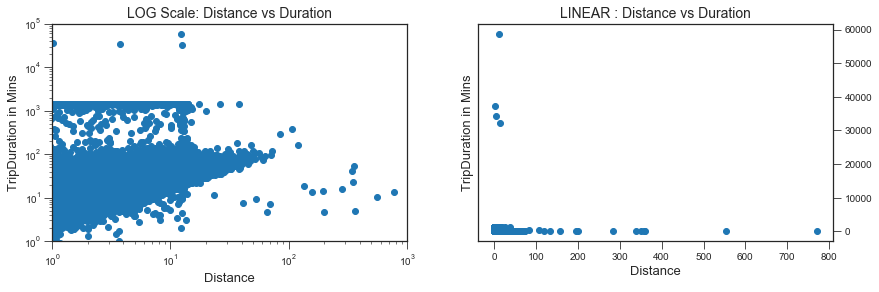

In [195]:
'''Lets check it by plotting a graph'''
fig=plt.figure(figsize=(14,4))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.scatter(x='Distance',y=train.trip_duration/60,data=train)
ax1.set_title('LOG Scale: Distance vs Duration',fontsize=14)
ax1.set_xlabel('Distance',fontsize=13)
ax1.set_ylabel('TripDuration in Mins',fontsize=13)
ax1.set_xscale('Log')
ax1.set_xlim([1,1000])
ax1.set_yscale('Log')
ax1.set_ylim([1,100000])

ax2.scatter(x='Distance',y=train.trip_duration/60,data=train)
ax2.set_title('LINEAR : Distance vs Duration',fontsize=14)
ax2.set_xlabel('Distance',fontsize=13)
ax2.set_ylabel('TripDuration in Mins',fontsize=13)
ax2.yaxis.set_ticks_position('right')




We observe that there are few outliers.There are few data points where the Distance is > 100 miles but the duration is less than a minute and vice versa as well. So when we train our model we will get rid of such data points. 

Text(0,0.5,'Log [Duration] in Mins ')

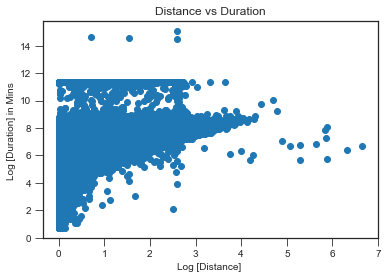

In [196]:
plt.scatter(x=np.log(train['Distance']+1),y=np.log(train['trip_duration']+1),data=train)
plt.title('Distance vs Duration')
plt.xlabel('Log [Distance] ')
plt.ylabel('Log [Duration] in Mins ')

Check the negative values of the log with actual values? It was showing us negative values because we had 0 as the distance so we add +1 to avoid getting negative values

# We will fetch the city name from the Latitude and Longitude columns.

In [197]:
import reverse_geocoder as rg    #Fetch City Name from the Longitude and Latitude
def getloc(x):
    s=(x[0],x[1])
    d=(x[2],x[3])
    source=rg.search(s)
    destination=rg.search(d)
    for i,j in zip(source,destination):
        source_loc=list(i.values())[2]
        destination_loc=list(j.values())[2]
        return pd.Series([source_loc,destination_loc])       #When returning more than 1 value 
    

In [198]:
df_cityname=df.copy().head(10)
df_cityname[['source','destination']]=df_cityname.apply(getloc,axis=1)

In [199]:
df_cityname

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,source,destination
0,40.767937,-73.982155,40.765602,-73.964630,Manhattan,Manhattan
1,40.738564,-73.980415,40.731152,-73.999481,Long Island City,New York City
2,40.763939,-73.979027,40.710087,-74.005333,Manhattan,New York City
3,40.719971,-74.010040,40.706718,-74.012268,New York City,New York City
4,40.793209,-73.973053,40.782520,-73.972923,Manhattan,Manhattan
5,40.742195,-73.982857,40.749184,-73.992081,Long Island City,Weehawken
6,40.757839,-73.969017,40.765896,-73.957405,Long Island City,Manhattan
7,40.797779,-73.969276,40.760559,-73.922470,Manhattan,Long Island City
8,40.738400,-73.999481,40.732815,-73.985786,New York City,New York City
9,40.744339,-73.981049,40.789989,-73.973000,Long Island City,Manhattan


Not an accurate technique

rg.search returns an Ordered Dictionary and we have to fetch values in a different way.
How to fetch value from Ordered Dictionary.  
Will show an example*

    

In [200]:
a=rg.search((40.749851, -73.990723))
for i in a:
    #print(i)            #This is an Ordered Dictionary
    values=i.values()
    keys=i.keys()
print(list(values)) #This will be a List.So after it is a list we can fetch in a similar way as we used to do-> list(values)[2]
print(list(keys))



print(list(values)[2])
#Other Technique where you are specific to fetch a value based on the keys
for x,y in zip(keys,values):
        if x=='name':
            print(y)

['40.76955', '-74.02042', 'Weehawken', 'New Jersey', 'Hudson County', 'US']
['lat', 'lon', 'name', 'admin1', 'admin2', 'cc']
Weehawken
Weehawken


# Remove Records which are outliers and only consider records for NYC

In [206]:
train.sort_values('Distance').head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Hour,Month,Day,DayName,Distance
327370,id2665887,1,2016-03-02 20:38:12,2016-03-02 20:38:21,1,-73.782310,40.644577,-73.782310,40.644577,N,9,20,3,2,Wednesday,0.0
1269826,id1826445,1,2016-04-01 00:00:08,2016-04-01 00:00:11,1,-73.782242,40.644466,-73.782242,40.644466,N,3,0,4,4,Friday,0.0


In [202]:
                                    #Step 1: Specify Latitude and Longitude Range 
    
west, south, east, north = -74.03, 40.63, -73.77, 40.85

train = train[(train.pickup_latitude> south) & (train.pickup_latitude < north)]
train = train[(train.dropoff_latitude> south) & (train.dropoff_latitude < north)]
train = train[(train.pickup_longitude> west) & (train.pickup_longitude < east)]
train = train[(train.dropoff_longitude> west) & (train.dropoff_longitude < east)]

In [203]:
                           #Step 2 :Remove values with 0 distance and trip duration greater than 120 secs.

train.drop(labels=train[(train['Distance']==0) & (train.trip_duration>120)].index,inplace=True)


In [204]:
                        #Step 3 : Remove records that are taking more than 5 Hours i.e 20000 seconds
train.drop(train[np.log(train['trip_duration'])>10].index,inplace=True)

In [205]:
                        #Step 4 :Remove records based on the miles covered and time taken

'''Can also go a bit in detail'''

train.drop(train[(train['Distance']<3) & (train['trip_duration']>4500)].index,inplace=True)  #*****
train.drop(train[(train['Distance']<5) & (train['trip_duration']>6000)].index,inplace=True)
train.drop(train[(train['Distance']<11) & (train['trip_duration']>8000)].index,inplace=True)
train.drop(train[(train['Distance']<18) & (train['trip_duration']>8200)].index,inplace=True)



Similarly we can do for larger miles and lesser duration

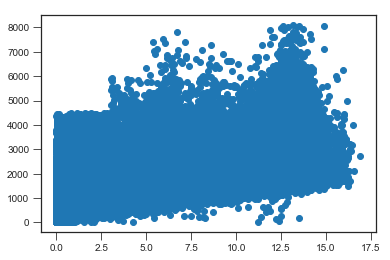

In [170]:
'''Check how the distribution is after eliminating few outliers'''
plt.scatter(y='trip_duration',x='Distance',data=train)



In [207]:
train[train['Distance']<1].sort_values('trip_duration')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Hour,Month,Day,DayName,Distance
596136,id2402793,1,2016-04-30 00:28:45,2016-04-30 00:28:46,1,-73.789658,40.647003,-73.789658,40.647003,N,1,0,4,5,Saturday,0.000000
1439166,id2943073,2,2016-01-03 16:55:44,2016-01-03 16:55:45,1,-73.975677,40.785488,-73.976372,40.785831,N,1,16,1,6,Sunday,0.043395
600247,id2517984,1,2016-01-09 00:28:55,2016-01-09 00:28:56,1,-73.861961,40.768559,-73.861961,40.768559,N,1,0,1,5,Saturday,0.000000
533799,id3563137,2,2016-04-15 17:32:22,2016-04-15 17:32:23,1,-73.782417,40.644154,-73.782433,40.644169,N,1,17,4,4,Friday,0.001324
726971,id2697717,2,2016-03-27 12:55:52,2016-03-27 12:55:53,2,-73.983154,40.767159,-73.983238,40.767097,N,1,12,3,6,Sunday,0.006090
761666,id1363579,1,2016-04-26 14:33:09,2016-04-26 14:33:10,1,-73.978676,40.715626,-73.978691,40.715626,N,1,14,4,1,Tuesday,0.000799
1360664,id0480433,1,2016-01-14 12:33:28,2016-01-14 12:33:29,1,-73.991486,40.741940,-73.991478,40.741955,N,1,12,1,3,Thursday,0.001128
279493,id1491861,1,2016-04-24 11:35:40,2016-04-24 11:35:41,1,-73.841423,40.695278,-73.841423,40.695274,N,1,11,4,6,Sunday,0.000264
610159,id0578509,1,2016-02-03 12:35:22,2016-02-03 12:35:23,1,-73.980560,40.754829,-73.980560,40.754829,N,1,12,2,2,Wednesday,0.000000
767271,id0229521,1,2016-06-25 23:45:12,2016-06-25 23:45:13,1,-73.982925,40.738781,-73.982925,40.738781,N,1,23,6,5,Saturday,0.000000


# Try to plot by using different maps capability

Simple Scatter plot 

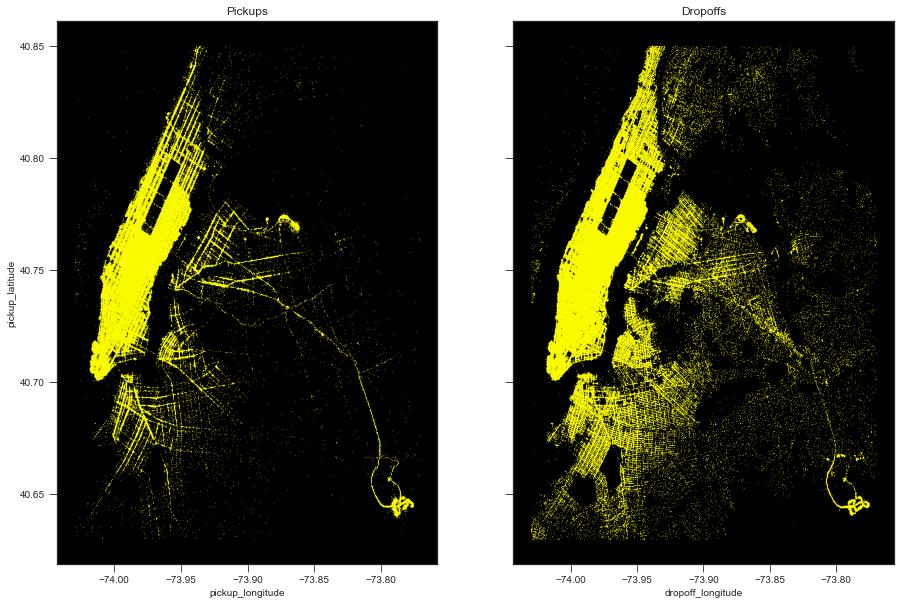

In [208]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))

train.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='yellow', 
                s=.02,alpha=.6,subplots=True, ax=ax1)
ax1.set_title("Pickups")
ax1.set_facecolor('black')

train.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("Dropoffs")
ax2.set_facecolor('black') 


In [209]:
#*****IMP FOLIUM*****
import folium
from folium.plugins import MarkerCluster

In [210]:
def Loc_Name(x):
    a=rg.search(x)
    for i in a:
        values=i.values()
        Location_Name=(list(values)[2])
    return Location_Name

In [211]:
height=300
width=900
location=[40.770779, -74.017616]
maps=folium.Map([40.749851, -73.990723],zoom_start=12,width=width,height=height)
folium.Marker(location,popup=Loc_Name(location),icon=folium.Icon(color='red',angle=45)).add_to(maps)
maps
#The maps icon and the location that it returns is different.Don't know which one is correct????

In [222]:
map_loc=train[['pickup_latitude','pickup_longitude']].head(10)
#print(list(map_loc.iloc[1]))
range(len(map_loc['pickup_latitude']))

[40.738563537597656, -73.98041534423827]


range(0, 10)

In [221]:
for i in range(len(map_loc['pickup_latitude'])):
    folium.Marker(location=list(map_loc.iloc[i])).add_to(maps)   #It has to be a list*****
maps

In [215]:
'''Creating Cluster'''
map2=folium.Map([40.749851, -73.990723],zoom_start=12)
marker_cluster = MarkerCluster().add_to(map2)
for i in range(len(map_loc['pickup_latitude'])):
    folium.Marker(list(map_loc.iloc[i])).add_to(marker_cluster)
map2

# Feature Selection